<a href="https://colab.research.google.com/github/kashindra-mahato/NLP/blob/main/gemini_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q python-dotenv

In [ ]:
! pip install -q -U google-generativeai

In [ ]:
import os
from pathlib import Path

In [ ]:
import textwrap
import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

In [ ]:
def to_markdown(text):
  text = text.replace('*', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
%%time
response = model.generate_content("What is the answer to everything in the Universe?")

CPU times: user 72.9 ms, sys: 8.47 ms, total: 81.3 ms
Wall time: 5.04 s


In [ ]:
to_markdown(response.text)

> 42

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [ ]:
response.candidates

[content {
  parts {
    text: "42"
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 157 ms, sys: 14.5 ms, total: 172 ms
Wall time: 11.3 s


In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The meaning of life is a profound and multifaceted question that has been pondered by philosophers
________________________________________________________________________________
, theologians, scientists, and individuals throughout history. There is no single, universally agreed-upon answer, as the meaning of life is a personal and subjective experience
________________________________________________________________________________
. However, several common themes and perspectives emerge when exploring this topic:

1. **Purpose and Fulfillment:** Many people find meaning in life by pursuing a sense of purpose and fulfillment. This can involve achieving personal goals, making a positive impact on others, or contributing to a cause or community that resonates with their values.
________________________________________________________________________________
 Engaging in meaningful activities that align with one's passions and interests can lead to a sense of accomplishment and fulfill

In [ ]:
response = model.generate_content('What is the meaning of life?', stream=True)

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

In [ ]:
try:
  response.text
except Exception as e:
  print(f"{type(e).__name__}: {e}")

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


In [ ]:
! curl -o image.jpg https://image.slidesharecdn.com/a458f332-69df-422b-bafe-b1d5910d712b-160501064334/95/resumeshivani-chopra-1-638.jpg?cb=1462085047

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 69738  100 69738    0     0   243k      0 --:--:-- --:--:-- --:--:--  243k


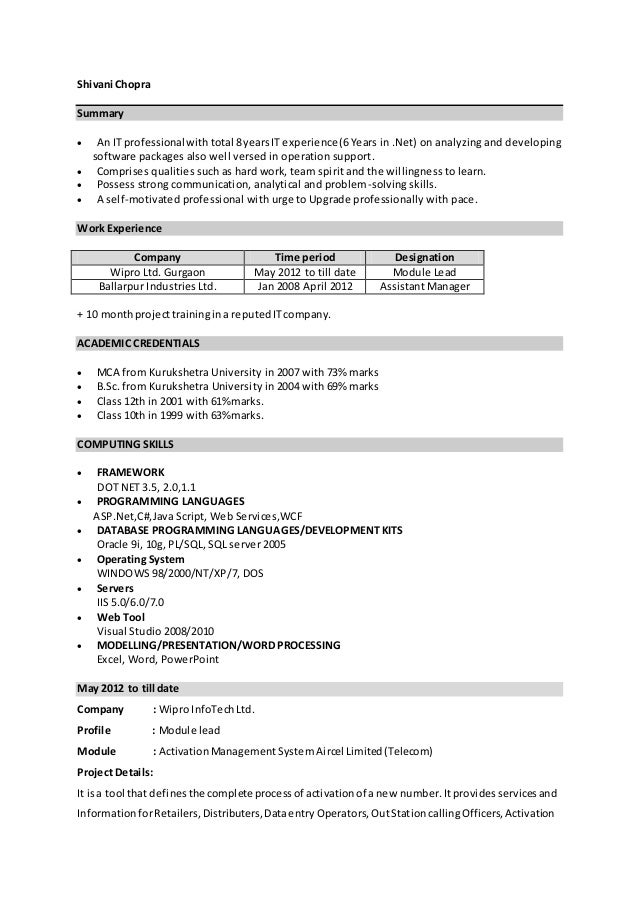

In [ ]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)

to_markdown(response.text)

>  # Shivani Chopra
> Summary
> An IT professional with total 8years IT experience (6 years in .Net) on analyzing and developing software packages also well versed in operation support.
> Comprises qualities such as hard work, team spirit and the willingness to learn.
> Possess strong communication, analytical and problem-solving skills.
> A self-motivated professional with urge to Upgrade professionalism with pace.
> 
> Work Experience
> Company	Wipro Ltd. Gurgaon	
> Time Period	May 2012 to till date
> Designation	Module Lead
> Company	Ballarpur Industries Ltd.	
> Time Period	Jan 2008 April 2012
> Designation	Assistant Manager
> 
> + 10 month project training in a reputed IT company.
> 
> Academic Credentials
> MCA from Kurukshetra University in 2007 with 73% marks
> B.Sc from Kurukshetra University in 2004 with 69% marks
> Class 12th in 2001 with 63%marks.
> Class 10th in 1999 with 63%marks.
> 
> Computing Skills
> Framework	.Net 3.5, 2.0.1.1
> Programming Languages	ASP.Net, C#, Java Script, Web Services, WCF
> Database Programming Languages/Development Kits	Oracle 9i, 10g, PL/SQL, SQL server 2005
> Operating System	Windows 98/2000/NT/XP/7, DOS
> Servers	Web Tool
> IIS 5.0/6.0/7.0
> Web Tool	Visual Studio 2008/2010
> Modeling/Presentation/Word Processing	Excel, Word, PowerPoint
> 
> May 2012 to till date
> Company	Wipro Infotech Ltd.
> Project Details:
> Module	Activation Management System Airtel (Telecom)
> 
> It is a tool that defines the complete process of activation of a new number. It provides services and information for Retailers, Distributors, DataEntry Operators, OutStation Officers, Activation

In [ ]:
response = model.generate_content(["Extract skills and experiences from the given image of resume and present in a json format.", img], stream=True)
response.resolve()

In [ ]:
to_markdown(response.text)

>  ```json
> {
>   "skills": [
>     ".NET",
>     "C#",
>     "SQL Server",
>     "WCF",
>     "ASP.NET",
>     "MVC",
>     "JavaScript",
>     "Web Services"
>   ],
>   "experience": [
>     {
>       "company": "Wipro Ltd.",
>       "location": "Gurgaon",
>       "title": "Module Lead",
>       "start_date": "May 2012",
>       "end_date": "Present"
>     },
>     {
>       "company": "Ballarpur Industries Ltd.",
>       "location": "Jaunpur",
>       "title": "Assistant Manager",
>       "start_date": "Jan 2008",
>       "end_date": "April 2012"
>     }
>   ],
>   "education": [
>     {
>       "institution": "MCA from Kurukshetra University",
>       "degree": "MCA",
>       "graduation_year": 2007,
>       "gpa": 73%
>     },
>     {
>       "institution": "B.Sc from Kurukshetra University",
>       "degree": "B.Sc",
>       "graduation_year": 2004,
>       "gpa": 69%
>     },
>     {
>       "institution": "Class 12th in 2001",
>       "degree": "12th",
>       "graduation_year": 2001,
>       "gpa": 63%
>     }
>   ]
> }
> ```

In [ ]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

In [ ]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer uses electricity to do math and store information, which helps to make pictures and sounds appear on the screen and to play games.

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer uses electricity to do math and store information, which helps to make pictures and sounds appear on the screen and to play games."
 }
 role: "model"]

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

A computer is a machine that can be programmed to carry out a set of instructions
________________________________________________________________________________
. It consists of hardware and software. Hardware refers to the physical components of the computer, such as the processor, memory, storage devices, and input/output
________________________________________________________________________________
 devices. Software refers to the programs that run on the computer and tell it what to do.

The processor, also known as the central processing unit (CPU), is the brain of the computer. It reads and executes the instructions in software. The memory, also known as random access memory (RAM), temporarily stores data
________________________________________________________________________________
 and instructions that are being processed by the CPU. Storage devices, such as hard disk drives and solid-state drives, store data and instructions permanently. Input/output devices, such as ke

In [ ]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

>   *  *user  *  *: In one sentence, explain how a computer works to a young child.

>   *  *model  *  *: A computer uses electricity to do math and store information, which helps to make pictures and sounds appear on the screen and to play games.

>   *  *user  *  *: Okay, how about a more detailed explanation to a high schooler?

>   *  *model  *  *: A computer is a machine that can be programmed to carry out a set of instructions. It consists of hardware and software. Hardware refers to the physical components of the computer, such as the processor, memory, storage devices, and input/output devices. Software refers to the programs that run on the computer and tell it what to do.
> 
> The processor, also known as the central processing unit (CPU), is the brain of the computer. It reads and executes the instructions in software. The memory, also known as random access memory (RAM), temporarily stores data and instructions that are being processed by the CPU. Storage devices, such as hard disk drives and solid-state drives, store data and instructions permanently. Input/output devices, such as keyboards, mice, and monitors, allow the user to interact with the computer and display output.
> 
> Computers work by following a set of instructions called a program. A program is a list of step-by-step instructions that tells the computer what to do. Programs are written in programming languages, which are human-readable languages that can be translated into machine code, which the computer can understand.
> 
> When a program is run, the computer loads the program into memory and the CPU begins executing the instructions in the program. The CPU reads each instruction, decodes it, and then performs the specified operation. The results of the operation are stored in memory or sent to an output device.
> 
> Computers are used for a wide variety of tasks, including word processing, spreadsheets, presentations, games, and web browsing. They are also used in a variety of industries, including business, education, healthcare, and scientific research.